In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Regressão

### Leitura e Modelagem dos Dados

In [2]:
# Leitura dos dados
dados = np.genfromtxt('./concrete.csv', delimiter=',')

# 5 primeiros dados do arquivo
dados[:5]

array([[ 540.  ,    0.  ,    0.  ,  162.  ,    2.5 , 1040.  ,  676.  ,
          28.  ,   79.99],
       [ 540.  ,    0.  ,    0.  ,  162.  ,    2.5 , 1055.  ,  676.  ,
          28.  ,   61.89],
       [ 332.5 ,  142.5 ,    0.  ,  228.  ,    0.  ,  932.  ,  594.  ,
         270.  ,   40.27],
       [ 332.5 ,  142.5 ,    0.  ,  228.  ,    0.  ,  932.  ,  594.  ,
         365.  ,   41.05],
       [ 198.6 ,  132.4 ,    0.  ,  192.  ,    0.  ,  978.4 ,  825.5 ,
         360.  ,   44.3 ]])

In [3]:
# Formato total dos nossos dados
dados.shape

(1030, 9)

#### Preparando as entradas do Modelo

In [4]:
# Separação dos conjuntos de treino e teste
# 80%, 20%

# A validação será usada

train_df, test_df = train_test_split(dados, test_size=0.2)

print(f"{train_df.shape}\n{test_df.shape}")

(824, 9)
(206, 9)


In [5]:
# Separação das features de cada um dos df
train_features = train_df[:,:-1]
test_features = test_df[:,:-1]

train_labels = train_df[:,[-1]]
test_labels = test_df[:,[-1]]

In [6]:
scaler = StandardScaler()

normed_train_data = scaler.fit_transform(train_features)
normed_test_data = scaler.transform(test_features)

### Construção do Modelo

In [7]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[train_features.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# Otimização via gradiente descendente estocástico
optimizer = tf.keras.optimizers.SGD(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae', 'mse'])

#### Detalhes Gerais

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2304      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________


#### Treinamento

In [9]:
EPOCHS = 1000

# Minibatch de 32
# Validação de 20% do total de dados
historico = model.fit(normed_train_data, train_labels,
                      epochs=EPOCHS, verbose=0, validation_split = 0.25, batch_size=32)

### Métricas Gerais

In [10]:
hist = pd.DataFrame(historico.history)
hist['epoch'] = historico.epoch
hist['epoch'] = hist['epoch'] + 1
hist.tail()

,loss,root_mean_squared_error,mae,mse,val_loss,val_root_mean_squared_error,val_mae,val_mse,epoch
995,19.696222,4.438043,3.322072,19.696222,30.252171,5.500197,3.673557,30.252171,996
996,18.757090,4.330945,3.191608,18.757090,28.801741,5.366725,3.576053,28.801741,997
997,20.360912,4.512307,3.350277,20.360912,30.892452,5.558098,3.750254,30.892452,998
998,23.010344,4.796910,3.451151,23.010344,56.279819,7.501988,5.131626,56.279819,999
999,22.690960,4.763503,3.479773,22.690960,33.191742,5.761228,3.894716,33.191742,1000


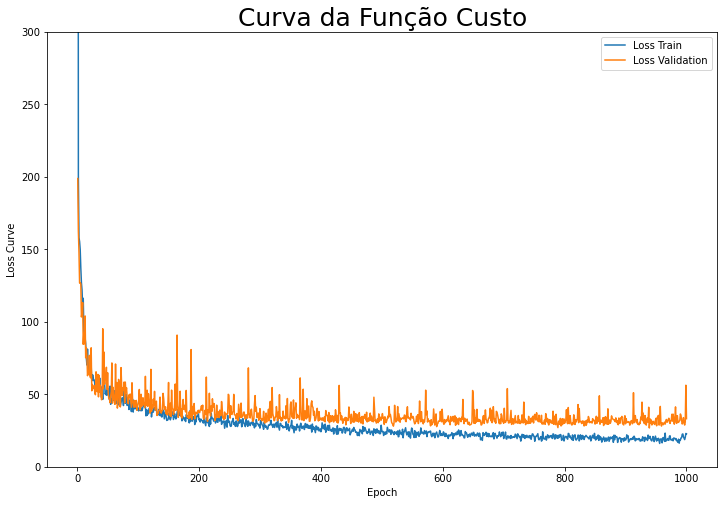

In [11]:
plt.figure(figsize=(12,8))
plt.plot(hist['epoch'], hist['loss'], label='Loss Train')
plt.plot(hist['epoch'], hist['val_loss'], label='Loss Validation')
plt.title('Curva da Função Custo', size=25)
plt.xlabel('Epoch')
plt.ylabel('Loss Curve')
plt.ylim([0,300])
plt.legend();

In [12]:
loss, rmse, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=3)

print("Testing set RMSE: {:5.2f}".format(rmse))
print("Testing set MAE: {:5.2f}".format(mae))
print("Testing set MSE: {:5.2f}".format(mse))

Testing set RMSE:  4.83
Testing set MAE:  3.45
Testing set MSE: 23.30


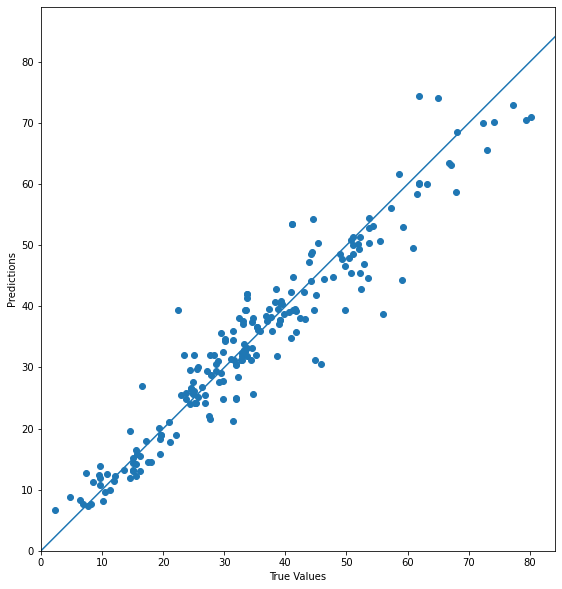

In [13]:
test_predictions = model.predict(normed_test_data).flatten()

plt.figure(figsize=(10,10))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100]);